# Overview

## What is Machine Learning?

Machine learning is a terminology for computer programs that provide computers the ability to perform a task without being explicitly programmed for that task.

:::{note}
Machine learning is somewhat remensicent of the synthetic programming technique for the HP-41C and Elektronika B3-34 calculators, involving creating instructions (or combinations of instructions and operands) that cannot be obtained using the standard capabilities of the calculator, thereby synthesizing behavior (code writing code, then executing the new code).  It is not clear if the creators behind the HP-41 were aware of all these "black holes". HP did not officially support these techniques, but was intrigued by the strange operations.   
:::

As an example, suppose we want to sort emails into promotional and non-promotional emails. In conventional programming, we can do this using a set of hard-coded rules or conditional statements. For instance, one possible rule is to classify an email as promotional if it contains the words “Discount”, “Sale”, or “Free Gift”. We can also classify an email as non-promotional if the email address includes “.gov” or “.edu”.  The problem with such an approach is that it is challenging to come up with the rules. 

For instance, while most emails from addresses that contain “.edu” are likely to be non-promotional (such as an email from your thesis supervisor), it is also possible for educational institutions to send promotional emails advertising their courses. It is almost impossible to come up with a set of rules that considers all possible scenarios.

Machine learning can improve the sorting program by identifying each email’s unique attributes and autonomously synthesize rules to automate the sorting process, thereby preventing the need for manually engineered rules.

For a machine to do that, we provide it with data. The goal is for the machine to infer useful rules directly from the data, using what are known as machine learning algorithms. In a nutshell, machine learning algorithms are made up of formulas and procedures derived from mathematical concepts in linear algebra, calculus, probability, statistics, and other fields. These formulas and procedures are implemented in programming code and used to perform calculations on our data. After performing the calculations, the algorithm typically generates an output known as a model (data model, prediction engine model, classification model - there are a lot of equivalent names). The process of generating a model is known as training. The model describes the rules, numbers, and any other algorithm-specific data structures that our machine learned from the data. Our machine can then use the model to perform the rules to new data.


## A Prediction Engine Example

A simple example of machine learning is the mundane process of fitting a model to data; or in ML jargon the building of a prediction engine (the model equation) and subsequent application of the engine to new situations.

Consider a simple case where we have some observations like:

|predictor1|predictor2|response|
|---:|---:|---:|
| 0.0 | 1.0 | 0.0 |
| 10.0 | 1.0 | 10.0 |
| 20.0 | 1.0 | 20.0 |
| 30.0 | 1.0 | 30.0 |
| 40.0 | 1.0 | 40.0 |
| 50.0 | 1.0 | 50.0 |
| 60.0 | 1.0 | 60.0 |
| 70.0 | 1.0 | 70.0 |
| 80.0 | 1.0 | 80.0 |
| 90.0 | 1.0 | 90.0 |
| 100.0 | 1.0 | 100.0 |
| 0.0 | 2.0 | 0.0 |
| 10.0 | 2.0 | 5.0 |
| 20.0 | 2.0 | 10.0 |
| 30.0 | 2.0 | 15.0 |
| 40.0 | 2.0 | 20.0 |
| 50.0 | 2.0 | 25.0 |
| 60.0 | 2.0 | 30.0 |
| 70.0 | 2.0 | 35.0 |
| 80.0 | 2.0 | 40.0 |
| 90.0 | 2.0 | 45.0 |
| 100.0 | 2.0 | 50.00 |
| 0.0 | 6.0 | 0.0 |
| 10.0 | 6.0 | 1.667 |
| 20.0 | 6.0 | 3.333 |
| 30.0 | 6.0 | 5.0 |
| 40.0 | 6.0 | 6.667 |
| 50.0 | 6.0 | 8.333 |
| 60.0 | 6.0 | 10.0 |
| 70.0 | 6.0 | 11.667 |
| 80.0 | 6.0 | 13.333 |
| 90.0 | 6.0 | 15.0 |
| 100.0 | 6.0 | 16.667 |

And if we simply try plotting we don't learn much.

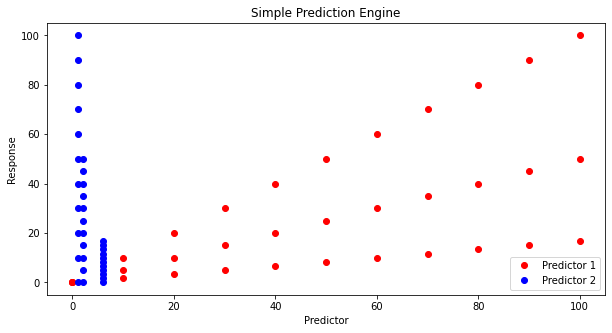

In [37]:
input1=[0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0,
        0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0,
        0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0,]
input2=[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,
        2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,
        6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0]
output=[0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,
       100.0,0.0,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0,0.0, 
       1.6666833333333333, 3.3333666666666666, 5.00005, 6.666733333333333, 8.333416666666666, 10.0001, 11.666783333333331, 13.333466666666666, 15.00015, 16.666833333333333]

import matplotlib.pyplot as plt # the python plotting library
plottitle ='Simple Prediction Engine' 
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot(input1, output, c='red',linewidth=0,marker='o') 
plt.plot(input2, output, c='blue',linewidth=0,marker='o')
#plt.plot(time, accumulate, c='blue',drawstyle='steps') # step plot
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.legend(['Predictor 1','Predictor 2'])
plt.title(plottitle)
plt.show()

Lets postulate a prediction engine structure as

$$r=\beta_1 p_1^{\beta_2} \cdot \beta_3 p_2^{\beta_4}$$

and try to pick values that make the model explain the data - here strictly by plotting.

First our prediction engine 

In [38]:
def response(beta1,beta2,beta3,beta4,predictor1,predictor2):
    response = (beta1*predictor1**beta2)*(beta3*predictor2**beta4)
    return(response)

Now some way to guess model parameters (the betas) and plot our model response against the observed response.  Here we choose to plot the observed values versus model values, if we find a good model, the line should plot as equal value line (45 degree line)  

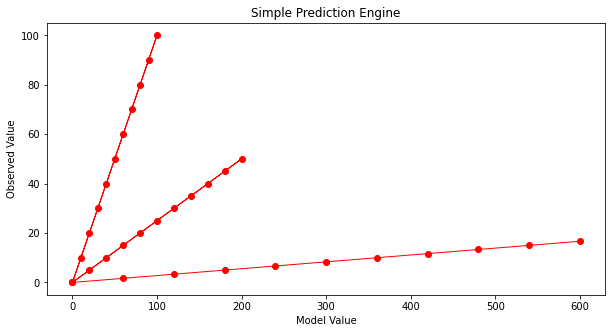

In [43]:
beta1 = 1
beta2 = 1
beta3 = 1
beta4 = 1

howmany = len(output)
modeloutput = [0 for i in range(howmany)]

for i in range(howmany):
    modeloutput[i]=response(beta1,beta2,beta3,beta4,input1[i],input2[i])
    
# now the plot
plottitle ='Simple Prediction Engine' 
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot(modeloutput, output, c='red',linewidth=1,marker='o') 
#plt.plot(input2, output, c='blue',linewidth=0,marker='o')
#plt.plot(time, accumulate, c='blue',drawstyle='steps') # step plot
plt.xlabel('Model Value')
plt.ylabel('Observed Value')
#plt.legend(['Predictor 1','Predictor 2'])
plt.title(plottitle)
plt.show()

Our first try is not too great.  Lets change $\beta_2$

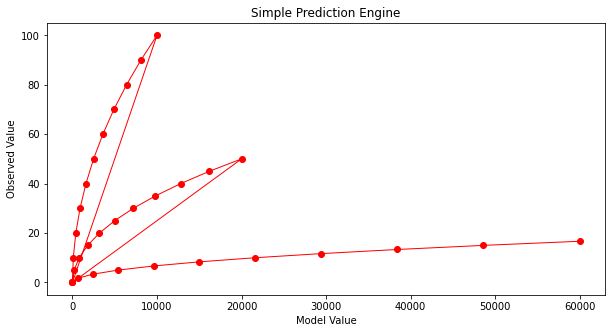

In [44]:
beta1 = 1
beta2 = 2
beta3 = 1
beta4 = 1

howmany = len(output)
modeloutput = [0 for i in range(howmany)]

for i in range(howmany):
    modeloutput[i]=response(beta1,beta2,beta3,beta4,input1[i],input2[i])
    
# now the plot
plottitle ='Simple Prediction Engine' 
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot(modeloutput, output, c='red',linewidth=1,marker='o') 
#plt.plot(input2, output, c='blue',linewidth=0,marker='o')
#plt.plot(time, accumulate, c='blue',drawstyle='steps') # step plot
plt.xlabel('Model Value')
plt.ylabel('Observed Value')
#plt.legend(['Predictor 1','Predictor 2'])
plt.title(plottitle)
plt.show()

Not much help.  After enough trials we might stumble on:

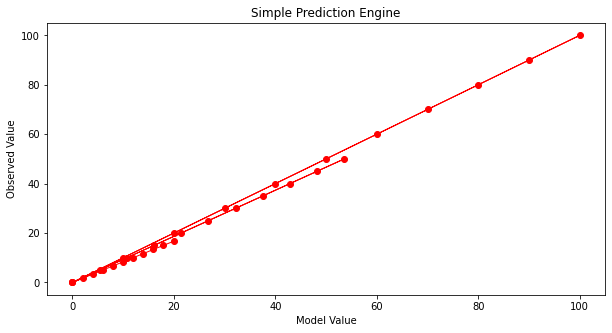

In [48]:
beta1 = 1
beta2 = 1
beta3 = 1
beta4 = -0.9

howmany = len(output)
modeloutput = [0 for i in range(howmany)]

for i in range(howmany):
    modeloutput[i]=response(beta1,beta2,beta3,beta4,input1[i],input2[i])
    
# now the plot
plottitle ='Simple Prediction Engine' 
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot(modeloutput, output, c='red',linewidth=1,marker='o') 
#plt.plot(input2, output, c='blue',linewidth=0,marker='o')
#plt.plot(time, accumulate, c='blue',drawstyle='steps') # step plot
plt.xlabel('Model Value')
plt.ylabel('Observed Value')
#plt.legend(['Predictor 1','Predictor 2'])
plt.title(plottitle)
plt.show()

And that's not too bad.  What would help is some systematic way to automatically update the model parameters until we get a good enough prediction engine, then go out and use it.  To get to perfection (which we can in this example because I know the data source), if we set the first three parameters to 1 and the last to -1 we obtain:

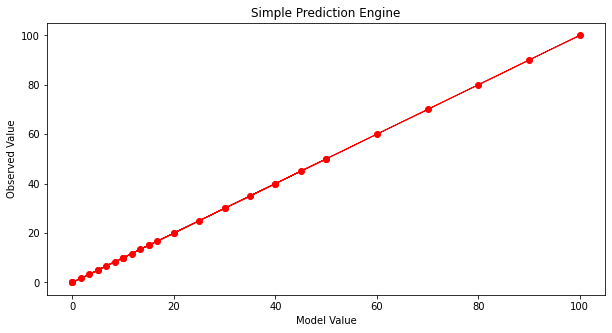

In [49]:
beta1 = 1
beta2 = 1
beta3 = 1
beta4 = -1

howmany = len(output)
modeloutput = [0 for i in range(howmany)]

for i in range(howmany):
    modeloutput[i]=response(beta1,beta2,beta3,beta4,input1[i],input2[i])
    
# now the plot
plottitle ='Simple Prediction Engine' 
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot(modeloutput, output, c='red',linewidth=1,marker='o') 
#plt.plot(input2, output, c='blue',linewidth=0,marker='o')
#plt.plot(time, accumulate, c='blue',drawstyle='steps') # step plot
plt.xlabel('Model Value')
plt.ylabel('Observed Value')
#plt.legend(['Predictor 1','Predictor 2'])
plt.title(plottitle)
plt.show()

Now with our machine all learned up we can use it for other cases, for instance if the inputs are [121,2]

In [52]:
print('predicted response is',response(beta1,beta2,beta3,beta4,121,2))

predicted response is 60.5


## Machine Learning Workflow

Despite the diverse applications of machine learning, most machine learning projects follow a typical workflow that includes some (or all) of the steps listed in this section.

- Step 1. Identify, Collect, and Loading Data. (Data Wrangling) The first step to any machine learning project is to load the data. Based on the data at hand, we would need different libraries to load the respective data.  If we are using a python derivative to perform the modeling then for loading CSV files, we need the pandas library. For loading 2D images, we can use the Pillow or OpenCV library. 

- Step 2. Examine the data. (Exploratory Data Analysis) Assuming the data has been loaded correctly, the next step is to examine the data to get a general feel for the dataset. Let us take the case of a simple CSV file-based dataset. For starters, we can look at the dataset’s shape (i.e., the number of rows and columns in the dataset). We can also peek inside the dataset by looking at its first 10 or 20 rows. In addition, we can perform fundamental analysis on the data to generate some descriptive statistical measures (such as the mean, standard deviation, minimum and maximum values). Last but not least, we can check if the dataset contains missing data. If there are missing values, we need to handle them.

- Step 3. Split the Dataset. (Training and Testing Subsets) Before we handle missing values or do any form of computation on our dataset, we typically typically split it into training and test subsets. A common practice is to use 80% of the dataset for training and 20% for testing although the proportions are up to the program designer. The training subset is the actual dataset used for training the model. After the training process is complete, we can use the test subset to evaluate how well the model generalizes to unseen data (i.e., data not used to train the model). It is crucial to treat the test subset as if it does not exist during the training stage. Therefore, we should not touch it until we have finished training our model and are ready to evaluate the selected model.

:::{note}
A huge philosophical issue arises if the testing set suggests that we have a crappy model - at that juncture if we change the model at all the testing set has just been used for training and calls into question the whole split data process.  This dilemma is rarely discussed in the literature, but is an important ethical issue to keep in mind when letting a machine control things that can kill. Most people think hellfire missles and drones, but water treatment plants under unattended autonomous control can kill as effectively as a missle.
:::

- Step 4. Data Visualization (Exploratory Data Analysis) After splitting the dataset, we can plot some graphs to better understand the data we are investigating. For instance, we can plot scatter plots to investigate the relationships between the features (explainatory variables, predictor variables, etc.) and the target (response) variable.

- Step 5. Data Preprocessing. (Data Structuring)   The next step is to do data preprocessing. More often than not, the data that we receive is not ready to be used immediately. Some problems with the dataset include missing values, textual and categorical data (e.g., “Red”, “Green”, and “Blue” for color), or range of features that differ too much (such as a feature with a range of 0 to 10,000 and another with a range of 0 to 5). Most machine learning algorithms do not perform well when any of the issues above exist in the dataset. Therefore, we need to process the data before passing it to the algorithm.

- Step 6. Model Training. After preparing the data, we are ready to train our models. Based on the previous steps of analyzing the dataset, we can select  appropriate machine learning algorithms and build models using those algorithms. 

- Step 7. Performance Evaluation.  After building the models, we need to evaluate our models using different metrics and select the best-performing model for deployment. At this stage, the technical aspects of a  machine learning project is more or less complete.

- Step 8. Deploy the Model.  Deploy the best-performing model.  Build a user interface so customers/designers/clients can apply the model to their needs.

- Step 9.  Monitoring and maintaining the model.  This step is quite overlooked in most documents on ML, even more so than deploy.  This step would audit post-deployment use and from time-to-time re-train the model with newer data.  Some industries perform this retraining almost continuously; in Civil Engineering the retraining may happen on a decade-long time scale perhaps even longer.  It depends on the consequence of failure, and the model value.

Consider Figure 2.1 below as another representation of workflow from [Machine Learning Workflow Explained](https://towardsdatascience.com/the-machine-learning-workflow-explained-557abf882079).  

<figure align="center">
<img src="https://miro.medium.com/max/700/1*XgcF3ayEH2Q8JEbZx8D09Q.png" width="800"> <figcaption>Figure 2.1. ML Workflow Diagram </figcaption>
</figure>

The figure components largely address each list item, some are shared, others combined - nevertheless we have a suitable workflow diagram.  The author of the diagram places data at the top and cycles from there, a subtle symbolic placement with which I wholly agree.  Read his blog post to see his thinking in that respect.

<a id=’#ref1’></a>
## References
1. Chan, Jamie. Machine Learning With Python For Beginners: A Step-By-Step Guide with Hands-On Projects (Learn Coding Fast with Hands-On Project Book 7) (p. 5-7). Kindle Edition. 

2. [Thevapalan, Arunn (2021). The Machine Learning Workflow Explained (and How You Can Practice It Now). Towards Data Science Blog](https://towardsdatascience.com/the-machine-learning-workflow-explained-557abf882079)
